# 28. HEPTA: CLUSTER MODEL TRAINING
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

hepta = pd.read_csv('data/hepta_df')
print(hepta.shape)
hepta.head()

(212, 4)


,col1,col2,col3,labels
0,-6.327e-02,0.028,0.023,1
1,-7.310e-04,0.048,0.069,1
2,-6.077e-02,-0.009,0.053,1
3,1.325e-02,-0.012,0.055,1
4,-5.451e-02,-0.004,0.002,1


In [2]:
hepta['labels'].value_counts()

1    32
7    30
6    30
5    30
4    30
3    30
2    30
Name: labels, dtype: int64

In [3]:
X_train = hepta.drop('labels', axis=1)
X_train.shape

(212, 3)

## 2. Finding the Optimal Number of Clusters

#### The Elbow Method

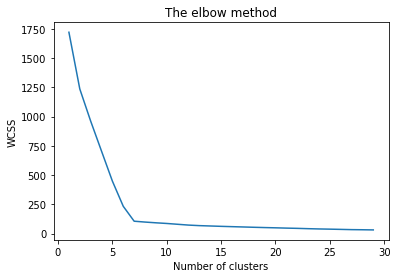

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 30):
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                     n_init = 10, random_state = 42)
    k_means.fit(X_train)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From the graph above, it is clear that `the optimum number of clusters is 7`, it is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

#### The Silhouette Score 

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, k_means.labels_)

0.42863850743748894

In [10]:
len(k_means.labels_)

212

In [11]:
k_means.labels_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15, 15,
        8,  8,  8, 15, 18,  0, 18,  0, 18,  0, 18, 15, 18,  8, 15,  0,  8,
       15, 15,  8, 15, 18, 18,  8,  8,  0,  8,  0, 19, 21, 27,  5, 12, 19,
       21, 12, 12, 19,  7, 21, 21, 19, 21,  7, 27, 21, 21,  7,  7,  5, 12,
       19,  7, 12, 19, 12,  5,  7,  2, 24,  2, 24, 24, 24, 10, 10, 10, 17,
       24, 17, 17, 24,  2, 17, 17,  2, 10,  2, 10, 10, 17,  2, 10,  2, 24,
        2, 24, 24, 28,  3, 25, 16, 26, 28, 25, 16, 16, 28, 16, 25, 26, 26,
       28, 25,  3,  3, 16,  3, 25, 26, 28, 26, 16, 28,  3, 25, 28, 16, 11,
        6,  6,  9, 11,  6, 11,  6, 20, 23, 11,  9, 20, 23, 20,  9, 23, 20,
        9, 23, 20, 23,  6,  9, 23,  9, 23, 20, 11,  9, 13, 14, 14, 22, 13,
       22, 13, 13, 22, 14, 14, 13, 13,  4, 22, 13, 13, 13,  4, 14,  4, 22,
       13, 13,  4, 13, 22,  4, 14, 13])

In [12]:
k_means.labels_.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'